<a href="https://colab.research.google.com/github/jsansao/teic-20231/blob/main/TCEIC_Licao1_ClassificacaoPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lição 1 - Perceptron - Conjuntos linearmente separáveis 

Nesta lição, vamos ver a aplicação das redes neurais de uma camada em um problema linearmente separável.  

Temos duas classes, com coordenadas bi-dimensionais. 


## Carregando as bibliotecas

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Lendo os dados em csv

In [ ]:
from sklearn.datasets import make_blobs

data, label = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)


## A dispersão dos dados (treinamento e teste)



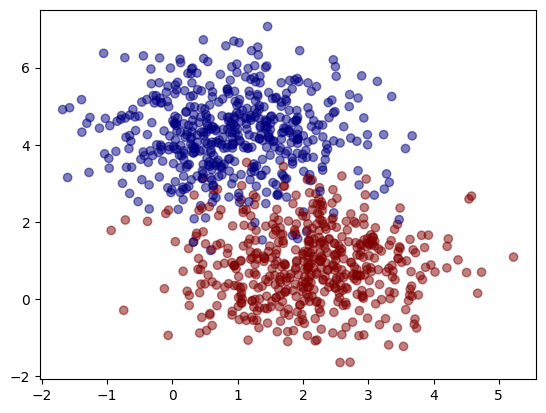

In [ ]:
plt.scatter(data[:,0], data[:,1], c=label , alpha=0.5, cmap='jet')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=0)

## Primeira tentativa: Rede neural com apenas um neurônio

In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, activation=tf.nn.sigmoid, input_shape=[2])])
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

model.summary()

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2828 - accuracy: 0.5613
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.5747
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2436 - accuracy: 0.5907
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2220 - accuracy: 0.6187
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2003 - accuracy: 0.6453
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1796 - accuracy: 0.6773
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.7227
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1431 - accuracy: 0.7507
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.8013
Epoch 10/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.8333
Epoch 11/50
24/24 [

## Dispersão da predição para o conjunto de teste

8/8 [==============================] - 0s 2ms/step


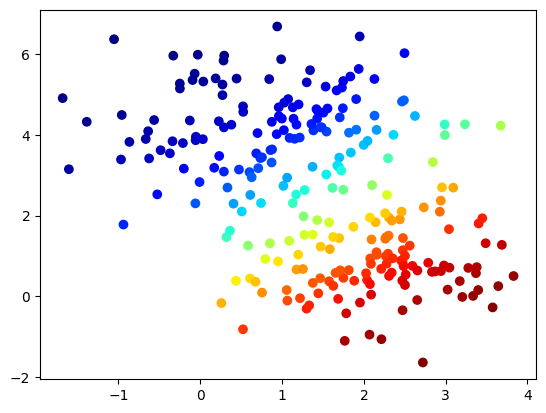

In [ ]:
y_predict = model.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1], c=y_predict , cmap='jet')
plt.show()

## Superfície gerada pela rede (predição)

313/313 [==============================] - 0s 1ms/step


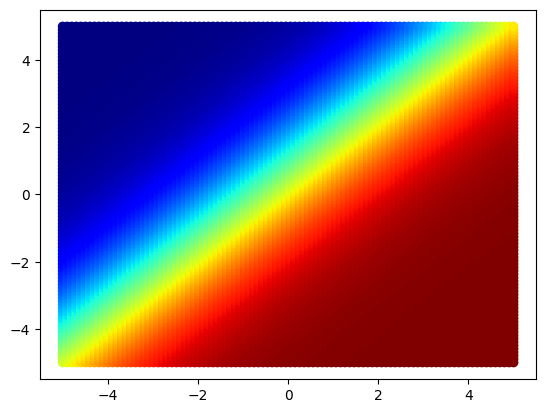

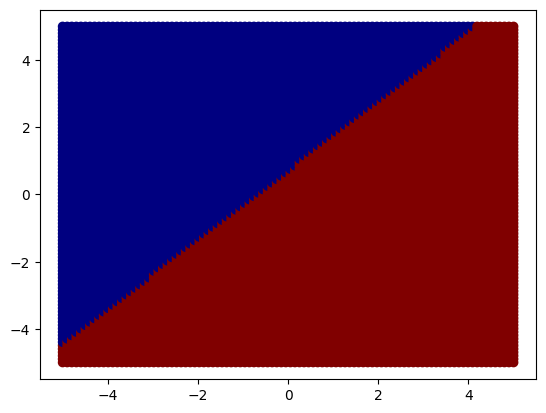

In [ ]:
nx = 100
ny = 100
x = np.linspace(-5, 5, nx)
y = np.linspace(-5, 5, ny)
xv,yv = np.meshgrid(x, y, sparse=False, indexing='ij')
test_grid_x =  xv.flatten()
test_grid_y =  yv.flatten()

grid_list = np.append(test_grid_x, test_grid_y, axis=0)

test_grid = np.reshape(grid_list, (2, -1))

test_predict4 = model.predict(test_grid.T)

plt.scatter(test_grid[0,:], test_grid[1,:], c=test_predict4, cmap='jet')

plt.show()

plt.scatter(test_grid[0,:], test_grid[1,:], c=(test_predict4>0.5), cmap='jet')

plt.show()

## Acurácia de validação

In [ ]:
model2 = tf.keras.Sequential([keras.layers.Dense(units=1, activation=tf.nn.sigmoid, input_shape=[2])])
model2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

history = model2.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))



model2.summary()

Epoch 1/50
24/24 [==============================] - 1s 13ms/step - loss: 0.3961 - accuracy: 0.5080 - val_loss: 0.3902 - val_accuracy: 0.5280
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3911 - accuracy: 0.5107 - val_loss: 0.3853 - val_accuracy: 0.5280
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3856 - accuracy: 0.5120 - val_loss: 0.3798 - val_accuracy: 0.5280
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3795 - accuracy: 0.5160 - val_loss: 0.3739 - val_accuracy: 0.5320
Epoch 5/50
24/24 [==============================] - 0s 15ms/step - loss: 0.3730 - accuracy: 0.5227 - val_loss: 0.3672 - val_accuracy: 0.5360
Epoch 6/50
24/24 [==============================] - 0s 11ms/step - loss: 0.3658 - accuracy: 0.5240 - val_loss: 0.3598 - val_accuracy: 0.5360
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 0.3577 - accuracy: 0.5267 - val_loss: 0.3515 - val_accuracy: 0.5360
Epoch 8/50
24/24 

## Evolução do treinamento

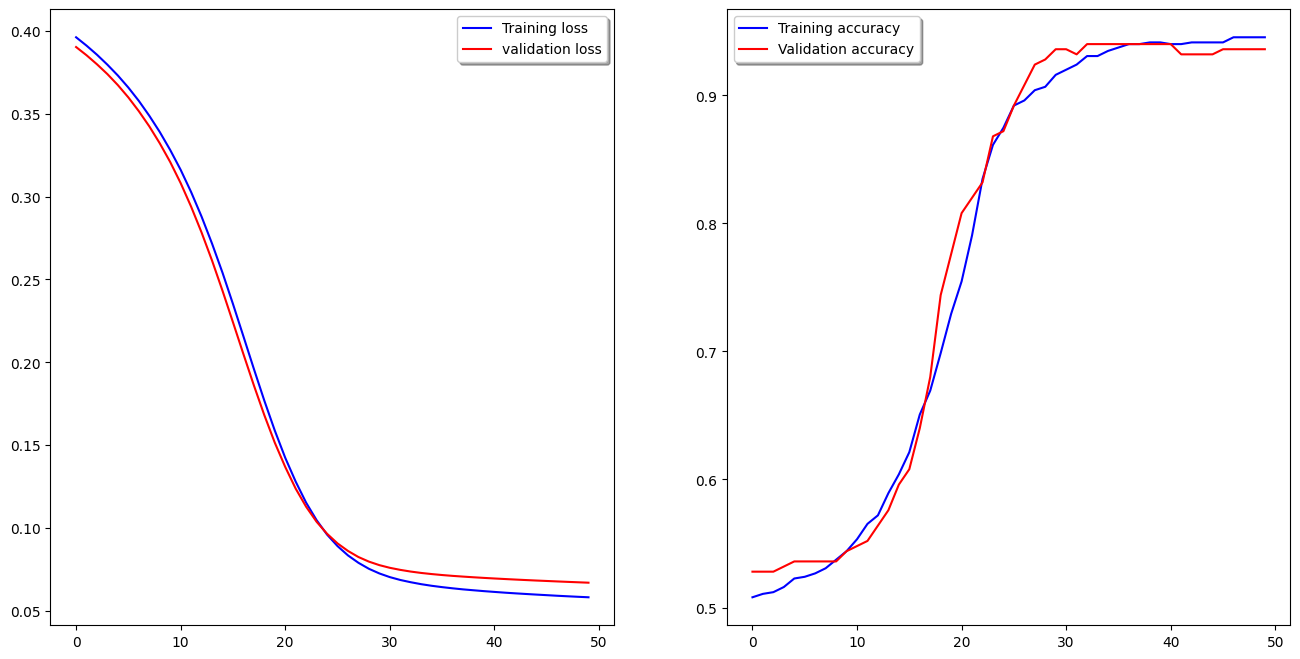

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

